<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-01-07 19:15:29
-------------------
qualified stocks: 89
with latest results: 84
still star stocks: 44
-------------------
Initial Investment:  1.04 C
CY Investment:  1.17 C
Reserve:  0.00
Current:  1.20 C
-------------------
Today PnL: 1.08 L (0.91%)
Current PnL: -9.15 L (-7.82%)
CY Booked + Current PnL: 2.35 L (2.01%)
-------------------
Total profit:  4.81 L
Total loss:  -13.96 L
-------------------
Total Booked + Current PnL: 15.46 L (14.88%)
Total Booked PnL: 24.61 L (23.68%)
Curr Year Booked PnL: 11.50 L (9.61%)
Prev Year Booked PnL: 13.11 L (12.62%)
Est FTT:  1.87 C
Est FTT PnL: 67.46 L (56.4%)
-------------------
Est LTT:  2.48 C
Est LTT PnL: 1.28 C (107.41%)
Deployed:  1.04 C
Current:  1.20 C
CAGR/XIRR %: 12.29%


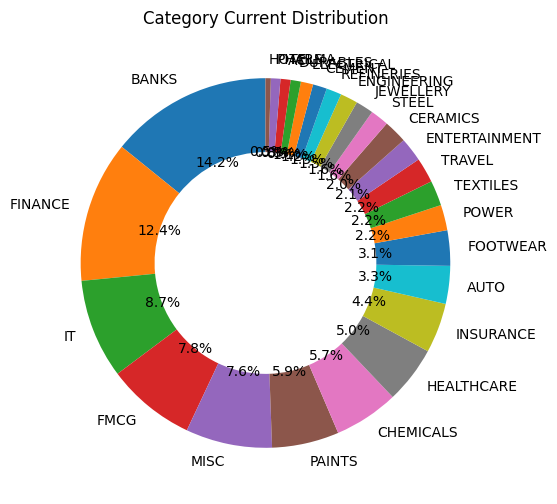

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
48,LALPATHLAB,2630.06,3545.00,-10.18,H-SC,74.16,136429.0,20706.0,19550.0,3.34,...,14.33,34.79,19.0,1.06,1.14,55.10,X40N,NTT,SC,HEALTHCARE
15,BAYERCROP,4346.57,6805.00,19.82,H-SC,33.71,89012.0,19467.0,19867.0,1.06,...,22.32,56.56,21.0,0.98,0.74,13.96,X40N,NTT,SC,CHEMICALS
12,BANKBARODA,195.74,283.00,-26.20,M-LC,13.48,91822.0,14505.0,19962.0,1.97,...,21.74,44.58,19.0,0.73,0.77,7.44,XR,NTT,LC,BANKS
72,SIS,477.00,528.00,65.72,M-SC,21.35,59798.0,-21292.0,29965.0,-0.76,...,50.11,10.69,-21.0,-0.71,0.50,0.00,X40N,NTT,SC,MISC
20,CERA,9059.90,10420.45,-4.52,H-SC,51.69,73850.0,-16749.0,30352.0,1.33,...,41.10,15.02,-51.0,-0.55,0.62,12.12,X40N,ATH,SC,CERAMICS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,REPCOHOME,527.76,880.00,-11.34,M-SC,7.87,153928.0,-40815.0,170799.0,0.72,...,110.96,66.74,-42.0,-0.24,1.29,11.75,XY24,NTT,SC,FINANCE
65,SAIL,130.64,228.00,49.92,M-MC,12.36,191951.0,-33011.0,200666.0,0.95,...,104.54,74.53,6.0,-0.16,1.60,4.06,XY24,BTT,MC,STEEL
60,RBLBANK,230.61,388.00,-38.80,M-SC,69.66,168676.0,-65624.0,225537.0,-0.46,...,133.71,68.25,-50.0,-0.29,1.41,9.14,XY24,NTT,SC,BANKS
11,BANDHANBNK,217.54,400.00,-44.38,M-SC,15.73,170013.0,-68628.0,268791.0,2.22,...,158.10,83.87,-25.0,-0.26,1.42,2.22,XY24,NTT,SC,BANKS


In [5]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
15,BAYERCROP,4346.57,6805.00,19.82,H-SC,33.71,89012.0,19467.0,19867.0,1.06,...,22.32,56.56,21.0,0.98,0.74,13.96,X40N,NTT,SC,CHEMICALS
12,BANKBARODA,195.74,283.00,-26.20,M-LC,13.48,91822.0,14505.0,19962.0,1.97,...,21.74,44.58,19.0,0.73,0.77,7.44,XR,NTT,LC,BANKS
72,SIS,477.00,528.00,65.72,M-SC,21.35,59798.0,-21292.0,29965.0,-0.76,...,50.11,10.69,-21.0,-0.71,0.50,0.00,X40N,NTT,SC,MISC
20,CERA,9059.90,10420.45,-4.52,H-SC,51.69,73850.0,-16749.0,30352.0,1.33,...,41.10,15.02,-51.0,-0.55,0.62,12.12,X40N,ATH,SC,CERAMICS
78,TATAELXSI,7332.28,9000.00,-16.15,H-MC,17.98,91593.0,-11059.0,34411.0,0.86,...,37.57,22.74,-5.0,-0.32,0.77,2.63,X40N,NTT,MC,IT
55,NESTLEIND,2228.06,2925.00,-19.29,H-LC,76.40,108420.0,-755.0,34900.0,1.27,...,32.19,31.28,NaN,-0.02,0.91,2.92,X40,BTT,LC,FMCG
17,BRITANNIA,4845.40,6446.05,-1.30,H-LC,85.39,106310.0,-289.0,35508.0,0.86,...,33.40,33.03,239.0,-0.01,0.89,4.86,AR,ATH,LC,FMCG
82,TRIDENT,37.35,48.00,68.11,M-SC,4.49,81386.0,-10868.0,37177.0,1.14,...,45.68,28.51,-11.0,-0.29,0.68,5.41,XR,NTT,SC,TEXTILES
49,LAOPALA,369.40,464.00,-16.39,M-SC,44.94,86104.0,-14742.0,40564.0,0.61,...,47.11,25.61,-41.0,-0.36,0.72,7.30,AR,NTT,SC,CERAMICS
52,MASFIN,326.60,401.09,-28.63,M-SC,57.30,79050.0,-18930.0,41280.0,2.35,...,52.22,22.81,-74.0,-0.46,0.66,2.35,XR,ATH,SC,FINANCE


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XY24') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
44,JIOFIN,320.24,387.0,-10.28,M-LC,16.85,147780.0,-10419.0,43403.0,0.83,...,29.37,20.85,65.0,-0.24,1.24,24.78,XY24,BTT,LC,FINANCE
19,CAMPUS,294.86,393.0,-1.79,M-SC,82.02,171838.0,4063.0,51775.0,0.60,...,30.13,33.28,18.0,0.08,1.44,40.79,XY24,NTT,SC,FOOTWEAR
79,TATAMOTORS,798.82,1065.0,-54.62,M-LC,77.53,162616.0,-1142.0,55712.0,2.19,...,34.26,33.32,-70.0,-0.02,1.36,9.84,XY24,NTT,LC,AUTO
29,GICRE,335.06,583.0,14.62,M-MC,97.75,197808.0,51387.0,56969.0,4.05,...,28.80,74.00,137.0,0.90,1.65,52.90,XY24,BTT,MC,INSURANCE
85,UNIONBANK,123.87,163.0,-16.17,M-MC,6.74,128265.0,-12575.0,57065.0,-1.66,...,44.49,31.59,-20.0,-0.22,1.07,4.22,XY24,NTT,MC,BANKS
24,DABUR,518.36,735.0,-9.55,H-MC,84.27,129757.0,-2425.0,57664.0,0.79,...,44.44,41.79,-3.0,-0.04,1.08,3.73,XY24,BTT,MC,FMCG
56,NHPC,82.08,115.0,183.44,M-MC,28.09,136048.0,-4965.0,61521.0,-0.10,...,45.22,40.11,-85.0,-0.08,1.14,16.95,XY24,NTT,MC,POWER
70,SFL,1034.30,1287.0,35.06,M-SC,98.88,251296.0,-1073.0,62723.0,5.10,...,24.96,24.43,-7.0,-0.02,2.10,32.03,XY24,NTT,SC,MISC
71,SHALBY,261.39,327.0,61.90,M-SC,53.93,163014.0,-18129.0,63592.0,2.34,...,39.01,25.10,-25.0,-0.29,1.36,11.70,XY24,NTT,SC,HEALTHCARE
53,MEDANTA,1022.60,1486.0,-4.55,H-SC,23.60,161538.0,6103.0,64341.0,-0.68,...,39.83,45.32,30.0,0.09,1.35,9.91,XY24,NTT,SC,HEALTHCARE


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
12,BANKBARODA,195.74,283.00,-26.20,M-LC,13.48,91822.0,14505.0,19962.0,1.97,...,21.74,44.58,19.0,0.73,0.77,7.44,XR,NTT,LC,BANKS
17,BRITANNIA,4845.40,6446.05,-1.30,H-LC,85.39,106310.0,-289.0,35508.0,0.86,...,33.40,33.03,239.0,-0.01,0.89,4.86,AR,ATH,LC,FMCG
82,TRIDENT,37.35,48.00,68.11,M-SC,4.49,81386.0,-10868.0,37177.0,1.14,...,45.68,28.51,-11.0,-0.29,0.68,5.41,XR,NTT,SC,TEXTILES
49,LAOPALA,369.40,464.00,-16.39,M-SC,44.94,86104.0,-14742.0,40564.0,0.61,...,47.11,25.61,-41.0,-0.36,0.72,7.30,AR,NTT,SC,CERAMICS
52,MASFIN,326.60,401.09,-28.63,M-SC,57.30,79050.0,-18930.0,41280.0,2.35,...,52.22,22.81,-74.0,-0.46,0.66,2.35,XR,ATH,SC,FINANCE
40,INDUSINDBK,1354.50,1800.00,-34.59,M-MC,80.90,56065.0,-21142.0,46534.0,1.40,...,83.00,32.89,-21.0,-0.45,0.47,5.83,XR,NTT,MC,BANKS
26,DMART,3504.64,5112.00,-24.84,H-LC,79.78,141721.0,12049.0,47420.0,-2.65,...,33.46,45.86,35.0,0.25,1.18,12.38,AR,NTT,LC,FMCG
38,IEX,133.39,219.00,-5.84,M-SC,50.56,194404.0,45141.0,50662.0,0.06,...,26.06,64.18,28.0,0.89,1.63,31.80,XR,NTT,SC,MISC
18,BSOFT,628.85,844.81,-5.10,M-SC,22.47,95812.0,-14237.0,52026.0,0.41,...,54.30,34.34,-22.0,-0.27,0.80,0.41,XR,ATH,SC,IT
25,DEN,52.79,75.00,-25.11,L-SC,35.96,66288.0,-18176.0,53713.0,-0.70,...,81.03,42.07,-18.0,-0.34,0.55,2.75,AR,NTT,SC,ENTERTAINMENT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.48
1,20,34.03
2,30,47.40


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,40.67
X40,21.09
X40N,14.94
XR,14.37
AR,6.13
X200,1.44
SR,1.38


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
M-SC,38.87
H-LC,22.46
H-SC,12.52
M-MC,11.08
H-MC,6.71
L-SC,3.43
M-LC,3.37


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          19.36
X40       H-LC          18.95
XY24      M-MC           9.01
XR        M-SC           7.63
X40N      M-SC           6.86
          H-SC           6.24
XY24      H-MC           3.72
          H-SC           3.31
XR        H-SC           2.97
AR        M-SC           2.65
XY24      M-LC           2.60
AR        H-LC           2.07
X40N      H-MC           1.84
XR        L-SC           1.79
X200      H-LC           1.44
SR        M-SC           1.38
XR        M-MC           1.21
X40       H-MC           1.15
XY24      L-SC           1.09
X40       M-SC           0.99
AR        M-MC           0.86
XR        M-LC           0.77
AR        L-SC           0.55
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.18,-12.54,65.83
FINANCE,12.37,-10.44,56.95
IT,8.69,-7.09,60.92
FMCG,7.78,-1.97,40.13
MISC,7.57,-0.24,37.39
PAINTS,5.87,-17.24,51.93
CHEMICALS,5.65,-7.13,74.73
HEALTHCARE,4.99,8.58,36.66
INSURANCE,4.35,7.25,42.79


In [13]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2791189.0
XR,1297743.0
X40N,948205.0
X40,863121.0
AR,620692.0
SR,179939.0
X200,45163.0


In [14]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M-SC,3396771.0
H-LC,882345.0
M-MC,865089.0
H-SC,641766.0
L-SC,381729.0
H-MC,345594.0
M-LC,119077.0


In [17]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1499349.0
X40       H-LC           754254.0
XR        M-SC           677279.0
XY24      M-MC           665050.0
X40N      M-SC           574184.0
AR        M-SC           410277.0
X40N      H-SC           292111.0
XR        L-SC           260387.0
          H-SC           213850.0
XY24      H-MC           210560.0
SR        M-SC           179939.0
XY24      H-SC           135805.0
XR        M-MC           126265.0
XY24      M-LC            99115.0
AR        H-LC            82928.0
X40N      H-MC            81910.0
AR        M-MC            73774.0
XY24      L-SC            67629.0
X40       M-SC            55743.0
AR        L-SC            53713.0
X40       H-MC            53124.0
X200      H-LC            45163.0
XR        M-LC            19962.0
Name: FTT Amt, dtype: float64

In [16]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,37
H-LC,15
H-SC,12
M-MC,10
H-MC,6
L-SC,5
M-LC,3
